In [2]:
install.packages("tensorflow")

Installing package into ‘/home/daz/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [3]:
df <- read.csv('6class.csv')
# Get the shuffled row indices
shuffled_indices <- sample(row.names(df))

# Shuffle the rows of the data frame
df <- df[shuffled_indices, ]


In [4]:
head(df)

,Temperature..K.,Luminosity.L.Lo.,Radius.R.Ro.,Absolute.magnitude.Mv.,Star.type,Star.color,Spectral.Class
,<int>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
7,2637,7.30e-04,0.127,17.22,0,Red,M
163,12675,4.52e+05,83.000,-5.62,4,Blue,O
107,24630,3.63e+05,63.000,-5.83,4,Blue,O
177,18000,2.00e+05,1045.000,-8.30,5,Blue,O
112,3605,1.26e+05,1124.000,-10.81,5,Red,M
9,2650,6.90e-04,0.110,17.45,0,Red,M


In [5]:
df <- df[, -c(6,7)]

In [6]:
head(df)

,Temperature..K.,Luminosity.L.Lo.,Radius.R.Ro.,Absolute.magnitude.Mv.,Star.type
,<int>,<dbl>,<dbl>,<dbl>,<int>
7,2637,7.30e-04,0.127,17.22,0
163,12675,4.52e+05,83.000,-5.62,4
107,24630,3.63e+05,63.000,-5.83,4
177,18000,2.00e+05,1045.000,-8.30,5
112,3605,1.26e+05,1124.000,-10.81,5
9,2650,6.90e-04,0.110,17.45,0


Numero de classes que o dataset contém.

In [7]:
unique(df$Star.type)

[1] 0 4 5 1 3 2

Separating features and labels

In [8]:
# Separate labels column
labels <- df$Star.type
# Remove the labels column from the original data frame
features <- df[, -which(names(df) == 'Star.type')]

In [9]:
head(features)

,Temperature..K.,Luminosity.L.Lo.,Radius.R.Ro.,Absolute.magnitude.Mv.
,<int>,<dbl>,<dbl>,<dbl>
7,2637,7.30e-04,0.127,17.22
163,12675,4.52e+05,83.000,-5.62
107,24630,3.63e+05,63.000,-5.83
177,18000,2.00e+05,1045.000,-8.30
112,3605,1.26e+05,1124.000,-10.81
9,2650,6.90e-04,0.110,17.45


In [10]:
cor(features)

,Temperature..K.,Luminosity.L.Lo.,Radius.R.Ro.,Absolute.magnitude.Mv.
Temperature..K.,1.00000000,0.3934041,0.06421597,-0.4202605
Luminosity.L.Lo.,0.39340408,1.0000000,0.52651572,-0.6926192
Radius.R.Ro.,0.06421597,0.5265157,1.00000000,-0.6087282
Absolute.magnitude.Mv.,-0.42026054,-0.6926192,-0.60872823,1.0000000


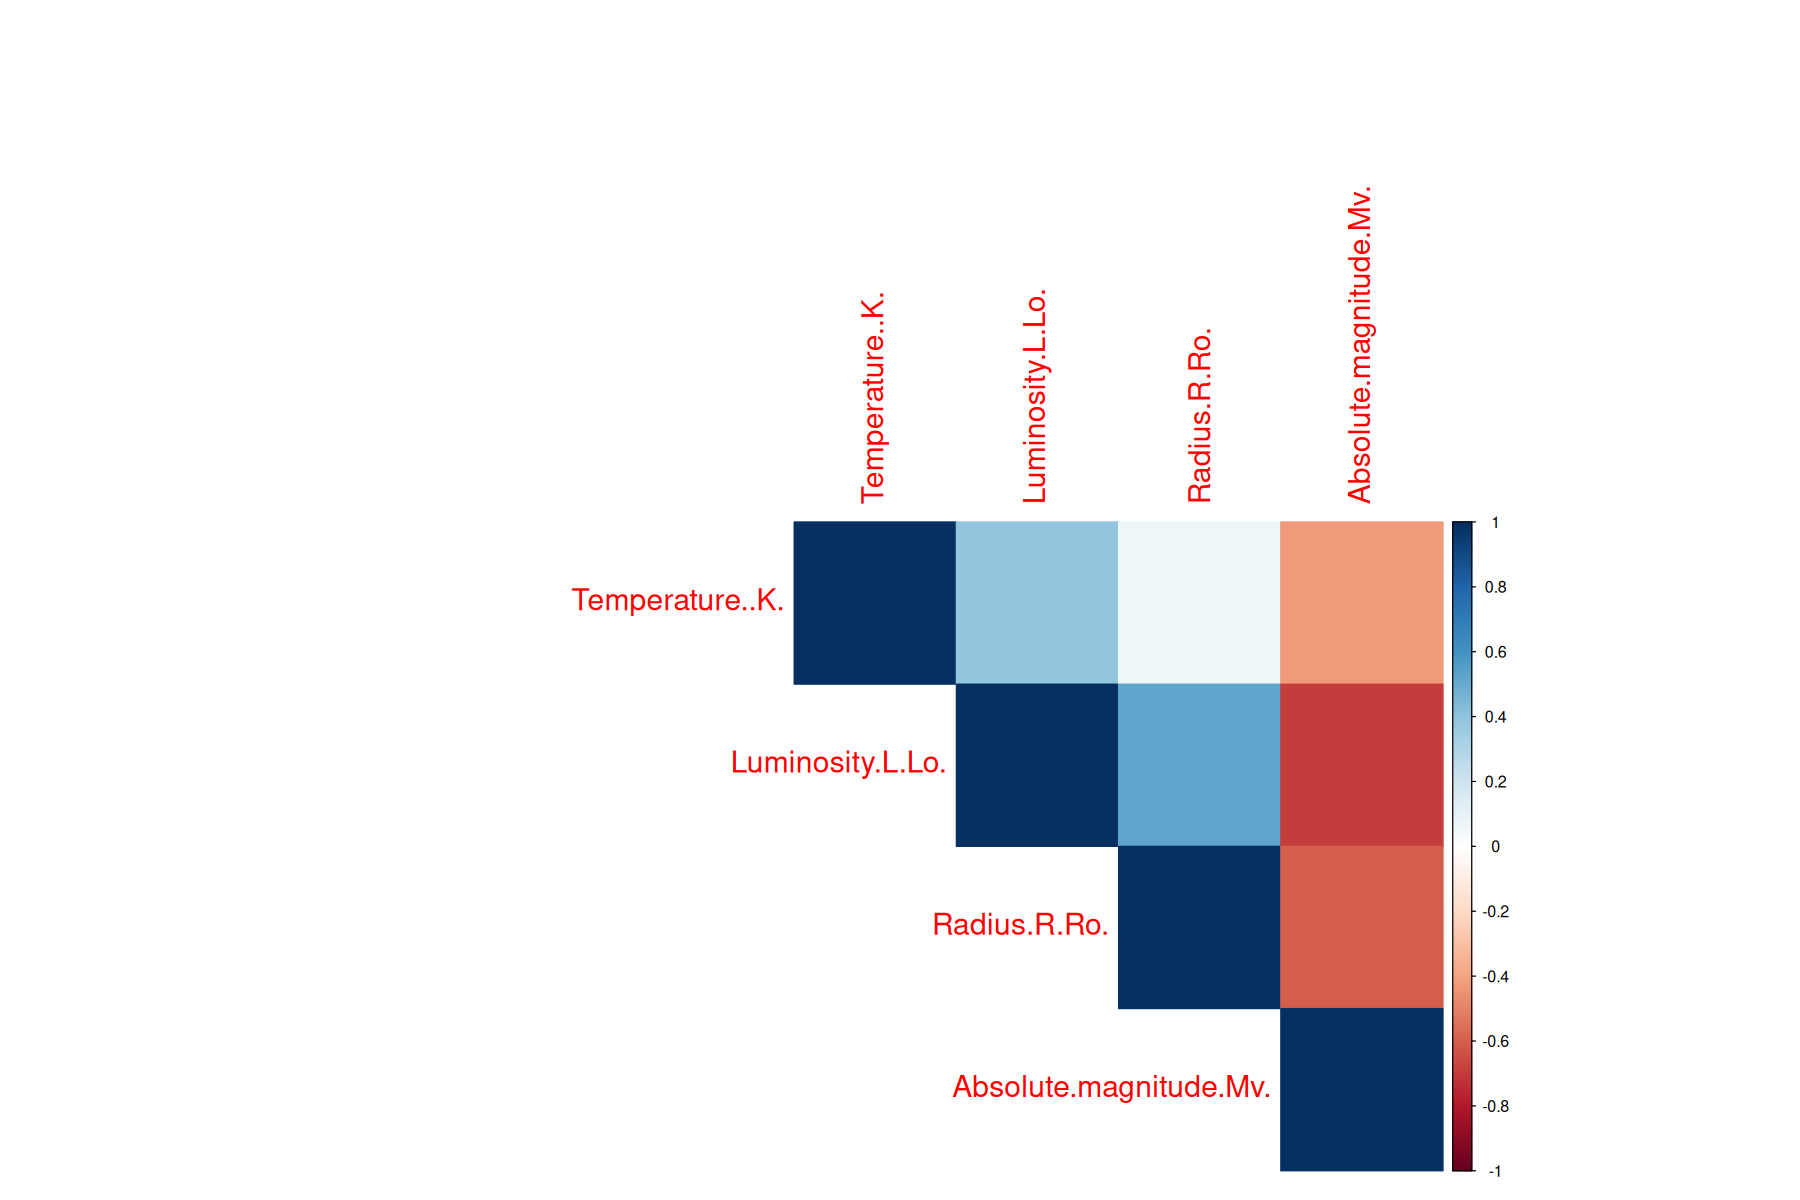

In [27]:
library(corrplot)

options(repr.plot.width = 15, iepr.plot.height = 15)

plot_corr <- function(features) {
  corr <- cor(features)
  corrplot(corr, method = "color", type = "upper", tl.cex = 1.5)
}

plot_corr(features)

In [12]:
features <- scale(features)

In [13]:
library(caret)

# Split data into training and test sets
split <- createDataPartition(labels, p = 0.7, list = FALSE)

x_train <- features[split, ]
x_test <- features[-split, ]
y_train <- labels[split ]
y_test <- labels[-split]


Loading required package: lattice



In [14]:
dim(x_train)
length(y_train)

[1] 168   4

[1] 168

In [15]:
library(keras)

model <- keras_model_sequential()
model %>%
  layer_flatten(input_shape = c(4)) %>%
  layer_dense(units = 200, activation = "relu") %>%
  layer_dense(units = 6, activation = "softmax")

model %>% compile(
  optimizer = "adam",
  loss = "sparse_categorical_crossentropy",
  metrics = c("accuracy")
)

In [16]:
head(x_train)

,Temperature..K.,Luminosity.L.Lo.,Radius.R.Ro.,Absolute.magnitude.Mv.
7,-0.8228761,-0.5973751,-0.4583354,1.2188549
107,1.4794712,1.4256726,-0.3367608,-0.9696068
177,0.7854066,0.5172517,1.5620869,-1.2041188
9,-0.8215152,-0.5973751,-0.4583682,1.2406920
198,-0.7329513,-0.5973751,-0.4579312,1.0023823
113,-0.7204937,0.5172517,2.7029424,-1.4917994


In [17]:
# Convert input data to matrix
# x_train <- as.matrix(x_train[, c("Temperature..K.", "Luminosity.L.Lo.", "Radius.R.Ro.", "Absolute.magnitude.Mv.")])
# x_train <- as.matrix(df)

# Ensure the input data is in the correct shape (number of samples x number of features)
# x_train <- t(x_train)

# Train the model
model %>% fit(
  x_train, y_train,
  epochs = 50,
)

In [18]:
# Evaluate the model
evaluation <- model %>% evaluate(x_test, y_test)

# Extract the loss and accuracy values
val_loss <- evaluation[[1]]
val_acc <- evaluation[[2]]

# Print the results
cat("Loss % =", val_loss * 100, ", Accuracy % =", val_acc * 100)


Loss % = 23.19509 , Accuracy % = 95.83333

In [19]:
# y_test
predictions <- model %>% predict(x_test)


#model prediction
categorical_data <- apply(predictions, 1, function(row) {
  which.max(row) 
})
categorical_data

[1] 5 6 1 4 4 2 2 1 2 1 3 6 5 5 4 6 6 1 6 1 3 6 6 1 3 2 3 6 3 4 1 5 1 2 5 4 3 3
[39] 1 6 1 3 1 1 2 3 2 4 5 4 6 2 3 6 5 5 2 6 4 5 1 1 4 4 3 4 3 5 5 2 4 4

# Visualizing the dataset

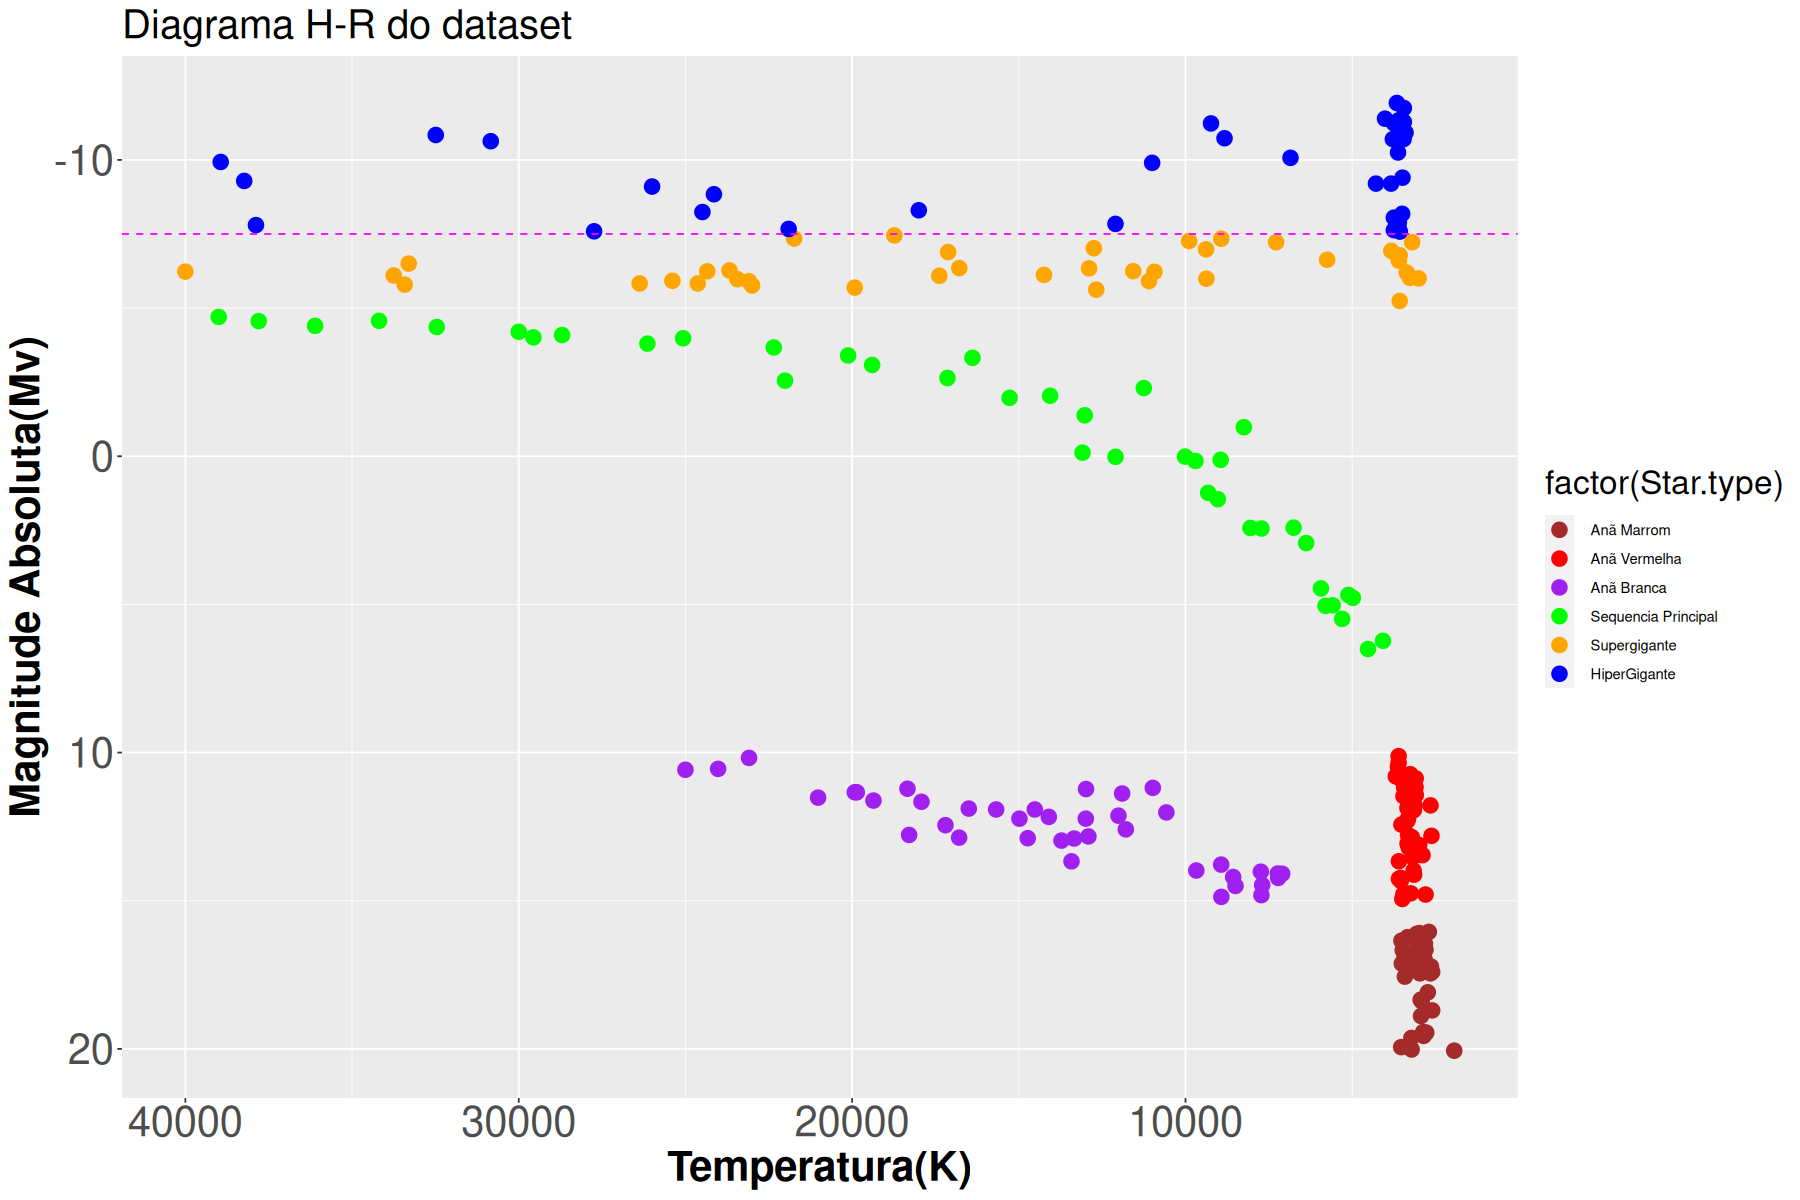

In [30]:
library(ggplot2)

# Read the CSV file
df1 <- read.csv('6class.csv')
# Extract the input features and labels
x1 <- as.matrix(df1[, c("Temperature..K.", "Luminosity.L.Lo.", "Radius.R.Ro.", "Absolute.magnitude.Mv.")])
y1 <- as.numeric(df1$Star.type)
y1 <- matrix(y1, ncol = 1)

# Initialize the scatter plot
p <- ggplot(data = df1, aes(x = Temperature..K., y = Absolute.magnitude.Mv., color = factor(Star.type)),cex=1.5) +
  geom_point(size=4)

# Customize the scatter plot
p <- p + scale_color_manual(
  values = c("brown", "red", "purple", "green", "orange", "blue"),
  labels = c("Anã Marrom", "Anã Vermelha", "Anã Branca", "Sequencia Principal", "Supergigante", "HiperGigante")
) + geom_hline(yintercept = -7.5, linetype = "dashed", color = "magenta") +
  geom_point(x = 5778, y = 4.83, color = "yellow", shape = "o", size = 9) +
  labs(x = "Temperatura(K)", y = "Magnitude Absoluta(Mv)",
       title = "Diagrama H-R do dataset",) +
  # coord_flip(xlim = c(max(df1$Temperature..K.), min(df1$Temperature..K.))) +
  scale_y_reverse() +
  scale_x_reverse() +
  theme(title=element_text(size=20),axis.text=element_text(size=25),
        axis.title=element_text(size=25,face="bold"))

# Show the plot
print(p)





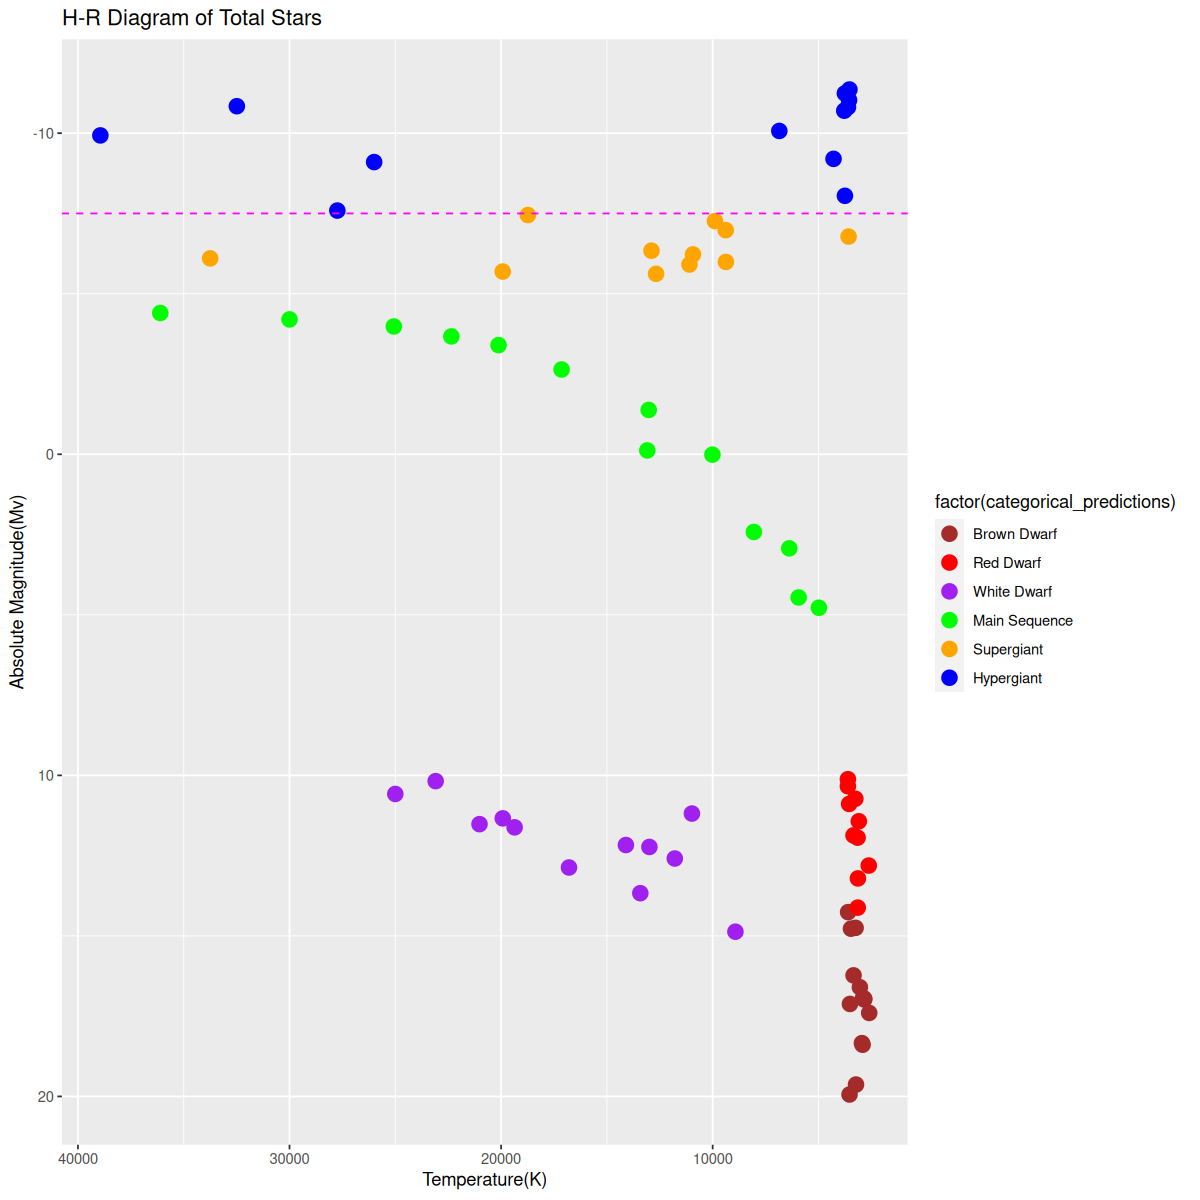

In [21]:
# y_test
predictions <- model %>% predict(x_test)


#model prediction
categorical_predictions <- apply(predictions, 1, function(row) {
  which.max(row) 
})

# Initialize the scatter plot
p <- ggplot(data = df[-split,], aes(x = Temperature..K., y = Absolute.magnitude.Mv., color = factor(categorical_predictions))) +
  geom_point(size=4)

# Customize the scatter plot
p <- p + scale_color_manual(
  values = c("brown", "red", "purple", "green", "orange", "blue"),
  labels = c("Brown Dwarf", "Red Dwarf", "White Dwarf", "Main Sequence", "Supergiant", "Hypergiant")
) + geom_hline(yintercept = -7.5, linetype = "dashed", color = "magenta") +
  geom_point(x = 5778, y = 4.83, color = "yellow", shape = "o", size = 9) +
  labs(x = "Temperature(K)", y = "Absolute Magnitude(Mv)",
       title = "H-R Diagram of Total Stars") +
  # coord_flip(xlim = c(max(df1$Temperature..K.), min(df1$Temperature..K.))) +
  scale_y_reverse() +
  scale_x_reverse()

# Show the plot
print(p)